<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Flip-and-rotate-all-images" data-toc-modified-id="Flip-and-rotate-all-images-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Flip and rotate all images</a></span></li><li><span><a href="#Concatenate-FOVs,-then-crop-useful-region" data-toc-modified-id="Concatenate-FOVs,-then-crop-useful-region-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Concatenate FOVs, then crop useful region</a></span></li><li><span><a href="#Run-Registration-on-all-files" data-toc-modified-id="Run-Registration-on-all-files-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Run Registration on all files</a></span></li><li><span><a href="#Registration-with-AstroAlign----pipeline-for-transforming-and-for-checking" data-toc-modified-id="Registration-with-AstroAlign----pipeline-for-transforming-and-for-checking-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Registration with AstroAlign -- pipeline for transforming and for checking</a></span><ul class="toc-item"><li><span><a href="#Test-on-problematic-FOVs" data-toc-modified-id="Test-on-problematic-FOVs-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Test on problematic FOVs</a></span></li><li><span><a href="#Run-Registration" data-toc-modified-id="Run-Registration-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Run Registration</a></span></li></ul></li></ul></div>

In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
import cv2
import re
import os

import tifffile as tiff

from helpers import *
import astroalign

In [2]:
Folders=dict()
Folders['HighMag']='/Volumes/prakash-lab/Projects/Octopi/3C, scan 1, part 1 split/'
Folders['lowMag']='../3C Octopi/BGremoved/'
Folders['HighMag_RF']='../3C Octopi/HighMag_RF/'
Folders['Virtual']='../3C Octopi/HighMag_Tiled/'
Folders['Aligned']='../3C Octopi/Registered/'

# Flip and rotate all images

In [9]:
flip_rotate_images(Folders)

20x 15% overlap002_part 1 - Stitched_001_001.tif
20x 15% overlap002_part 1 - Stitched_001_002.tif
20x 15% overlap002_part 1 - Stitched_001_003.tif
20x 15% overlap002_part 1 - Stitched_001_004.tif
20x 15% overlap002_part 1 - Stitched_001_005.tif
20x 15% overlap002_part 1 - Stitched_001_006.tif
20x 15% overlap002_part 1 - Stitched_001_007.tif
20x 15% overlap002_part 1 - Stitched_001_008.tif
20x 15% overlap002_part 1 - Stitched_001_009.tif
20x 15% overlap002_part 1 - Stitched_001_010.tif
20x 15% overlap002_part 1 - Stitched_002_001.tif
20x 15% overlap002_part 1 - Stitched_002_002.tif
20x 15% overlap002_part 1 - Stitched_002_003.tif
20x 15% overlap002_part 1 - Stitched_002_004.tif
20x 15% overlap002_part 1 - Stitched_002_005.tif
20x 15% overlap002_part 1 - Stitched_002_006.tif
20x 15% overlap002_part 1 - Stitched_002_007.tif
20x 15% overlap002_part 1 - Stitched_002_008.tif
20x 15% overlap002_part 1 - Stitched_002_009.tif
20x 15% overlap002_part 1 - Stitched_002_010.tif
20x 15% overlap002_p

# Concatenate FOVs, then crop useful region

In [3]:
#high mag
pixel_size=0.365623*10**-6
# nb_pixel_y=3081
# nb_pixel_x=2755

nb_pixel_y=4000
nb_pixel_x=3000

In [4]:
#OCTOPI
fov_oct=1.6*10**-3
offset=dict()
#there is an offset in the different picture

# 3B
# offset['x']=3000*pixel_size
# offset['y']=1500*pixel_size

#3C
offset['x']=3000*pixel_size
offset['y']=0*pixel_size
#difference on each side
delta=3*10**-4

In [21]:
concatenate_crop_ROI(nb_pixel_x,nb_pixel_y,delta,fov_oct,Folders,offset)

_00_00_fluorescent_linearRGB.png
0_0.png
(6017, 6017)
---------------
_00_01_fluorescent_linearRGB.png
0_1.png
(6017, 6017)
---------------
_00_02_fluorescent_linearRGB.png
0_2.png
(6017, 6017)
---------------
_00_03_fluorescent_linearRGB.png
0_3.png
(6017, 6017)
---------------
_00_04_fluorescent_linearRGB.png
0_4.png
(6017, 6017)
---------------
_00_05_fluorescent_linearRGB.png
0_5.png
(6017, 6017)
---------------
_00_06_fluorescent_linearRGB.png
0_6.png
(6017, 6017)
---------------
_00_07_fluorescent_linearRGB.png
0_7.png
(6017, 6017)
---------------
_00_08_fluorescent_linearRGB.png
0_8.png
(6017, 6017)
---------------
_00_09_fluorescent_linearRGB.png
0_9.png
(6017, 6017)
---------------
_00_10_fluorescent_linearRGB.png
0_10.png
(6017, 6017)
---------------
_00_11_fluorescent_linearRGB.png
0_11.png
(6017, 4701)
---------------
_01_00_fluorescent_linearRGB.png
1_0.png
(6017, 6017)
---------------
_01_01_fluorescent_linearRGB.png
1_1.png
(6017, 6017)
---------------
_01_02_fluorescent

9_9.png
(6017, 6017)
---------------
_09_10_fluorescent_linearRGB.png
9_10.png
(6017, 6017)
---------------
_09_11_fluorescent_linearRGB.png
9_11.png
(6017, 4701)
---------------
_10_00_fluorescent_linearRGB.png
10_0.png
(6017, 6017)
---------------
_10_01_fluorescent_linearRGB.png
10_1.png
(6017, 6017)
---------------
_10_02_fluorescent_linearRGB.png
10_2.png
(6017, 6017)
---------------
_10_03_fluorescent_linearRGB.png
10_3.png
(6017, 6017)
---------------
_10_04_fluorescent_linearRGB.png
10_4.png
(6017, 6017)
---------------
_10_05_fluorescent_linearRGB.png
10_5.png
(6017, 6017)
---------------
_10_06_fluorescent_linearRGB.png
10_6.png
(6017, 6017)
---------------
_10_07_fluorescent_linearRGB.png
10_7.png
(6017, 6017)
---------------
_10_08_fluorescent_linearRGB.png
10_8.png
(6017, 6017)
---------------
_10_09_fluorescent_linearRGB.png
10_9.png
(6017, 6017)
---------------
_10_10_fluorescent_linearRGB.png
10_10.png
(6017, 6017)
---------------
_10_11_fluorescent_linearRGB.png
10_11.

# Run Registration on all files

In [40]:
th=150
PIXEL_TOL=50
run_registration(Folders,th,PIXEL_TOL)

_00_00_fluorescent_linearRGB.png
ERROR: Could not find Registration -- skip FOV
_00_01_fluorescent_linearRGB.png
ERROR: Could not find Registration -- skip FOV
_00_02_fluorescent_linearRGB.png
ERROR: Could not find Registration -- skip FOV
_00_03_fluorescent_linearRGB.png
ERROR: Could not find Registration -- skip FOV
_00_04_fluorescent_linearRGB.png
Registration Succesful
_00_05_fluorescent_linearRGB.png
Other Error
_00_06_fluorescent_linearRGB.png
Other Error
_00_07_fluorescent_linearRGB.png
Other Error
_00_08_fluorescent_linearRGB.png
Other Error
_00_09_fluorescent_linearRGB.png


KeyboardInterrupt: 

# Registration with AstroAlign -- pipeline for transforming and for checking

Source : https://github.com/toros-astro/astroalign/blob/master/README.md

In [5]:
aa.__all__

['MAX_CONTROL_POINTS',
 'MIN_MATCHES_FRACTION',
 'MaxIterError',
 'NUM_NEAREST_NEIGHBORS',
 'PIXEL_TOL',
 'apply_transform',
 'estimate_transform',
 'find_transform',
 'matrix_transform',
 'register']

## Test on problematic FOVs

In [31]:
img_virtual=cv2.imread(Folders['Virtual']+'0_1.png',0)
img_lowMag=cv2.imread(Folders['lowMag']+'_00_01_fluorescent_linearRGB.png',0)


In [32]:
th=150
img_virtual_bin=binarize_img(img_virtual,th,True)
img_lowMag_bin=binarize_img(img_lowMag,th,False)

In [33]:
sources_lM=aa._find_sources(img_lowMag_bin)
sources_lM.shape

(7, 2)

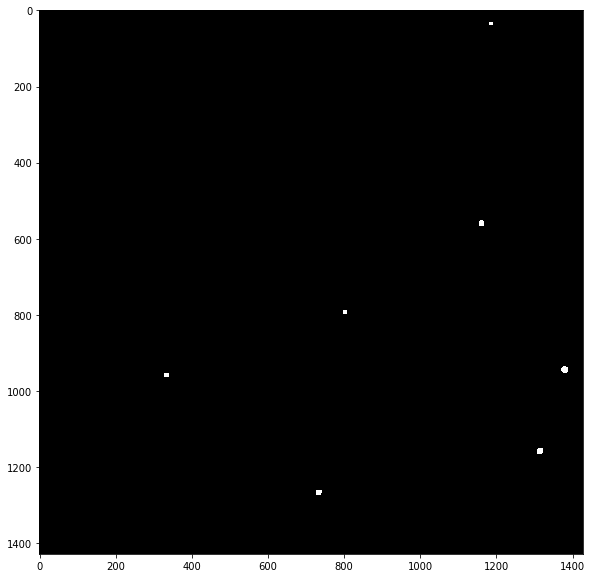

In [34]:
plt.figure(figsize=(10,10))
plt.imshow(img_lowMag_bin,cmap='gray', vmin=0, vmax=255)

In [35]:
sources_virtual=aa._find_sources(img_virtual_bin)
sources_virtual.shape

(22, 2)

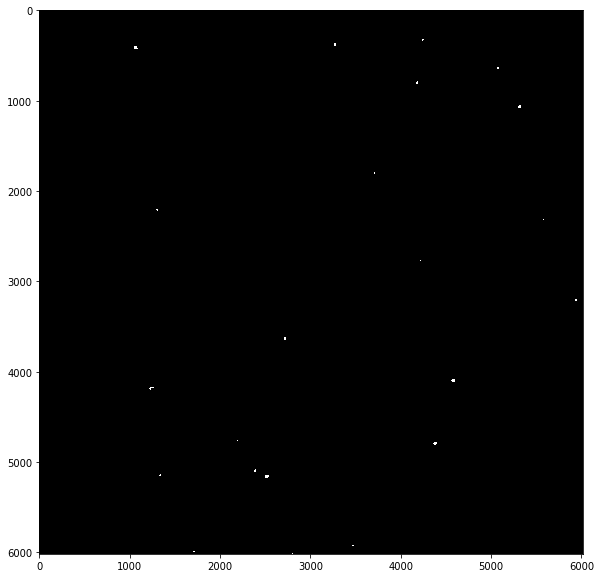

In [36]:
plt.figure(figsize=(10,10))
plt.imshow(img_virtual_bin,cmap='gray', vmin=0, vmax=255)

In [17]:
img_test=img_virtual_bin[1500:5000,2500:]

In [28]:
sources_test=aa._find_sources(img_test)
sources_test.shape

(7, 2)

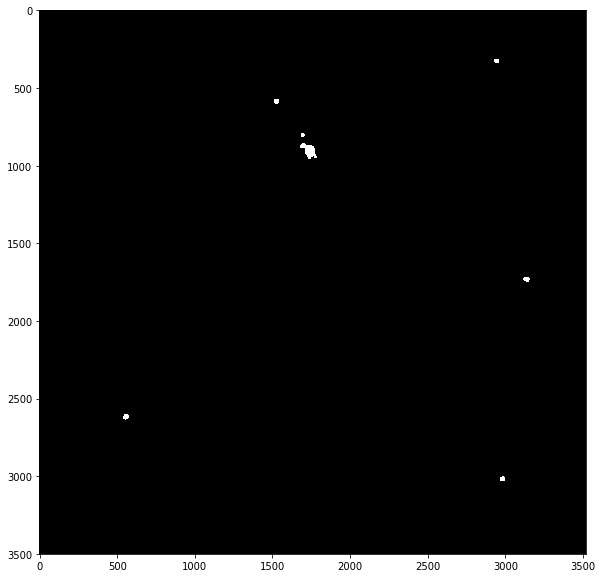

In [19]:
plt.figure(figsize=(10,10))
plt.imshow(img_test,cmap='gray', vmin=0, vmax=255)

## Run Registration

In [38]:
aa.NUM_NEAREST_NEIGHBORS=20
aa.PIXEL_TOL=2
# aa.MIN_MATCHES_FRACTION=0.1
transf, (pos_img_virtual, pos_img_lM) = aa.find_transform(img_virtual_bin, img_lowMag_bin)

MaxIterError: Max iterations exceeded while trying to find acceptable transformation.

In [22]:
registered_image = aa.apply_transform(transf,img_virtual_bin, img_lowMag)
img_aligned=registered_image[0]*3

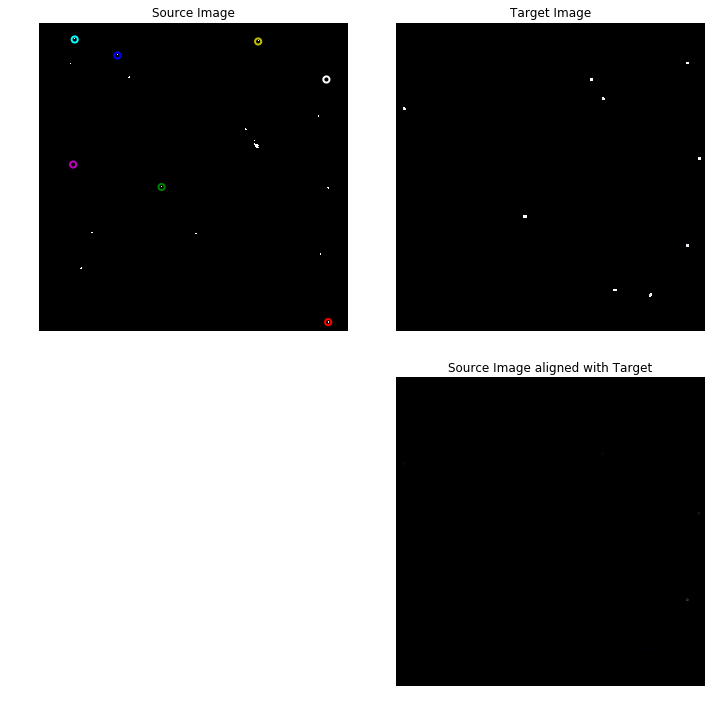

In [24]:
r=60
viz_ref_points(img_virtual_bin,img_lowMag_bin,img_aligned,transf,pos_img_virtual,pos_img_lM,r,circles=True)